## Prior, Posterior and Likelihood Calculations

In [88]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection, datasets
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
pi = np.pi
np.random.seed(5)

In [89]:
def gauss(x, mu, sig):
    return (1/np.sqrt(2*pi*sig**2))*np.exp(-(((x-mu)/sig)**2)/2)

In [90]:
gauss (1,0, 0.5)

0.10798193302637613

p(x|wi) is the likelihood i.e. the probability of observing quantity x given a state of nature wi

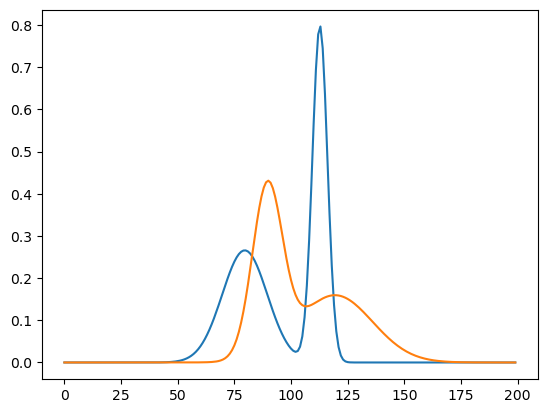

In [91]:
x = np.linspace(-10,20,200)
f = gauss(x,2,1.5) + gauss(x,7,0.5)
g = gauss(x,8,2.5) + gauss(x,3.5,1)
fig, ax = plt.subplots()
ax.plot(f)
ax.plot(g)


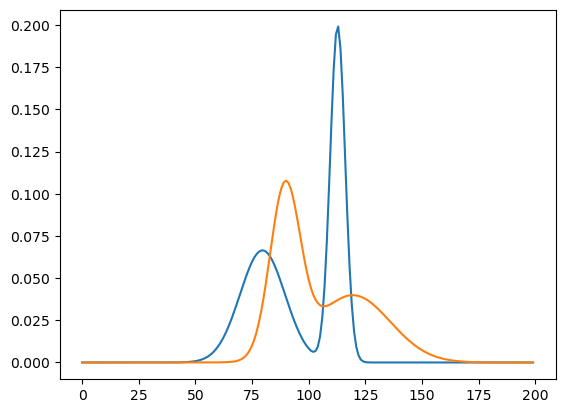

In [92]:
# Scaling both distributions so that the sum of their integrals ~1
while np.trapz(f,x)+np.trapz(g,x) > 1:
    f,g = (f*0.99,g*0.99)
fig, ax = plt.subplots()
ax.plot(f)
ax.plot(g)

p(wi|x) = (p(x|wi)*p(wi))/px

([<matplotlib.lines.Line2D at 0x161138abc40>],
 [<matplotlib.lines.Line2D at 0x161138a8df0>])

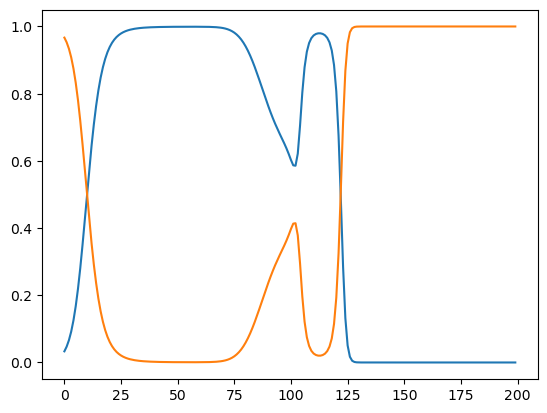

In [93]:
pw1 = 0.9
pw2 = 0.1
px = f*pw1 + g*pw2
pxw1 = f*pw1/px
pxw2 = g*pw2/px
fig,ax = plt.subplots()
ax.plot(pxw1), ax.plot(pxw2)

### Using a Naive Baye's Approach
- Here we do the whole shabang of using Bayesian stats to find the highest posterior probabilities which we'll use to define classes in each case.
- This approach is 'naive' because it assumes independence of conditional probabilities between labels.
- We assume that the conditional probabilities follow a Gaussian/ Normal distribution hence the use of GaussianNB to find the MLE of parameters for this distribution (namely mean and variance) - check obsidian notes for a rundown of this process


In [94]:
X,y = datasets.make_classification(n_samples = 1000, n_informative=2, n_features=2, n_redundant=0)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.33)


In [95]:
clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB()

In [96]:
def gen_sample_grid (npx=200, npy=200, limit =1):
    '''
    Returns a sample grid of every possible combination of the two inputs 
    '''
    x1line = np.linspace (-limit,limit,npx)
    x2line = np.linspace (-limit,limit,npy)
    x1grid, x2grid = np.meshgrid(x1line,x2line)
    Xgrid = np.array([x1grid, x2grid]).reshape([2,npx*npy]).T
    return Xgrid, x1line, x2line

In [97]:
X_grid, x1line, x2line = gen_sample_grid(limit = 3)

(-3.0, 3.0)

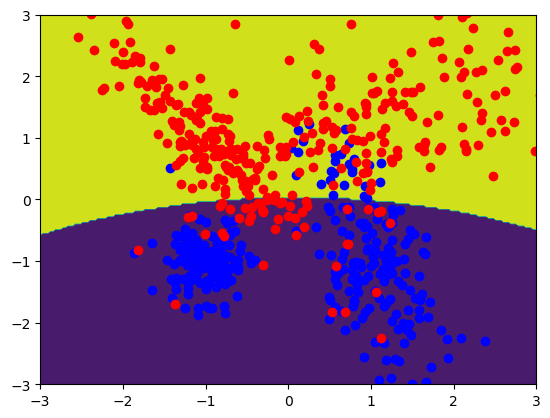

In [98]:
classVals = clf.predict(X_grid)
classVals = np.reshape(classVals, [200,200])
fig, ax = plt.subplots()
ax.contourf(x1line,x2line,classVals)
ax.scatter(X_train[y_train ==0,0], X_train[y_train ==0,1], c = 'blue')
ax.scatter(X_train[y_train ==1,0], X_train[y_train ==1,1], c = 'red')
ax.set_xlim(-3,3)
ax.set_ylim(-3,3)

In [99]:
predictions = clf.predict(X_test)
correct = 0
for i, prediction in enumerate(predictions):
    correct += 1 if prediction == y_test[i] else 0

accuracy = round((correct/len(y_test))*100,0)
print (f'{accuracy}% Accuracte ({correct}/{len(y_test)})')

91.0% Accuracte (301/330)


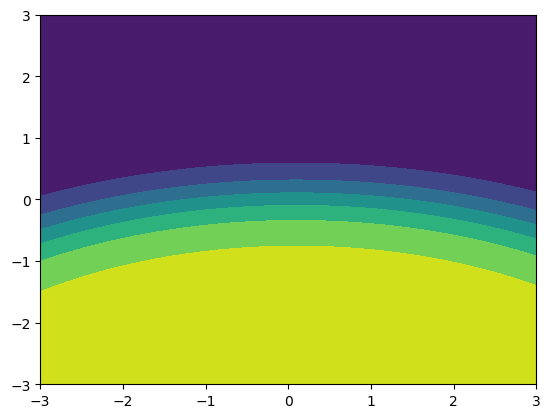

In [109]:
probVals = clf.predict_proba(X_grid)
#choose one of the two classifiers:
probVals = probVals[:,0]
probGrid = np.reshape(probVals, [200,200])
fig, ax = plt.subplots()
ax.contourf(x1line,x2line,probGrid)